In [1]:
import json
import matplotlib.pyplot as plt
with open('test_results0', 'r') as f:
    results = json.load(f)

In [6]:
patient_list = [int(key.split('_')[0]) for key in results.keys()]
sup_test_acc = list()
log_test_acc = list()
tuned_test_acc = list()
for key in results.keys():
    sup_test_acc.append(results[key]['sup_res'][0]['test_acc'])
    log_test_acc.append(results[key]['logistic_res'][0]['test_acc'])
    tuned_test_acc.append(results[key]['fully_tuned_res'][0]['test_acc'])


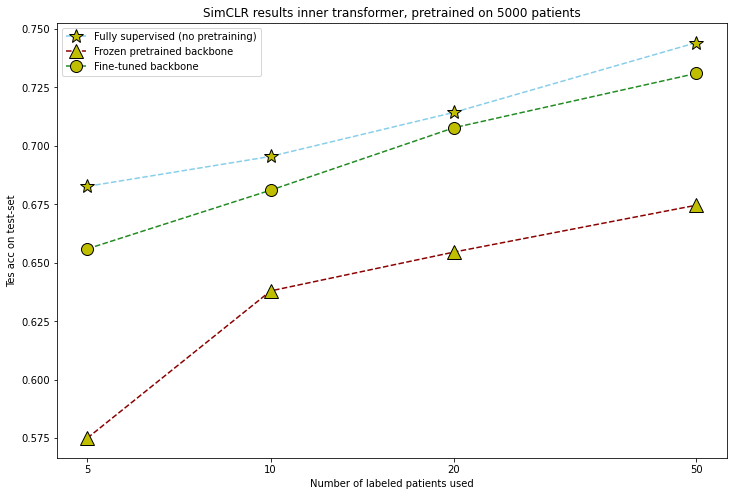

In [9]:
fig = plt.figure(figsize=(12,8))
plt.plot(patient_list, sup_test_acc, '--', color="skyblue", marker="*", markeredgecolor="#000", markerfacecolor="y", markersize=14)
plt.plot(patient_list, log_test_acc, '--', color="darkred", marker="^", markeredgecolor="#000", markerfacecolor="y", markersize=14)
plt.plot(patient_list, tuned_test_acc, '--', color="forestgreen", marker="o", markeredgecolor="#000", markerfacecolor="y", markersize=12)
plt.xscale("log")
plt.xticks(patient_list, labels=patient_list)
plt.title("SimCLR results inner transformer, pretrained on 5000 patients")
plt.xlabel("Number of labeled patients used")
plt.ylabel("Tes acc on test-set")
plt.minorticks_off()
plt.legend(["Fully supervised (no pretraining)", "Frozen pretrained backbone", "Fine-tuned backbone"])
plt.savefig('simclr_graph.png', facecolor="white")
plt.show()